Procedure to remove duplicates folder-wise.
We remove the images which are onserved to be duplicates after each execution of the merged folder.

In [36]:
import hashlib
from scipy.misc import imread, imresize, imshow
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
import numpy as np

In [2]:
pip install scipy==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.6 MB 4.7 MB/s 
  Created wheel for scipy: filename=scipy-1.1.0-cp38-cp38-linux_x86_64.whl size=41843111 sha256=d5033e49896b4e87e17b1bb41aafb7bd10f4a5140f3757dad7b5f50a2cc39661
  Stored in directory: /root/.cache/pip/wheels/29/a9/5e/9e4eddde37a1e15cf5cb404ba197df482cc39ffbfef91ec337
Successfully built scipy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.3.0 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.1.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have sci

In [37]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()


In [38]:
import os
os.getcwd()


'/content/images'

In [29]:
#Switching to the category directory
os.chdir(r'cardboard')
os.getcwd()


FileNotFoundError: ignored

In [39]:
#Fetching the number of images in the directory
file_list = os.listdir()
print(len(file_list))

9


In [40]:
import hashlib, os
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))

In [41]:
#Array identifying similar images by identification number
duplicates

[(7, 1)]

<ipython-input-42-a4b26ca261bb>:3: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  plt.subplot(121),plt.imshow(imread(file_list[file_indexes[1]]))
<ipython-input-42-a4b26ca261bb>:5: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  plt.subplot(122),plt.imshow(imread(file_list[file_indexes[0]]))


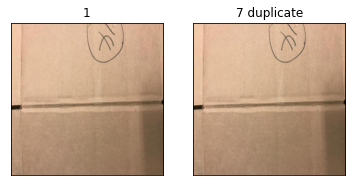

In [42]:
for file_indexes in duplicates[:30]:
    try:
        plt.subplot(121),plt.imshow(imread(file_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(imread(file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    except OSError as e:
        continue